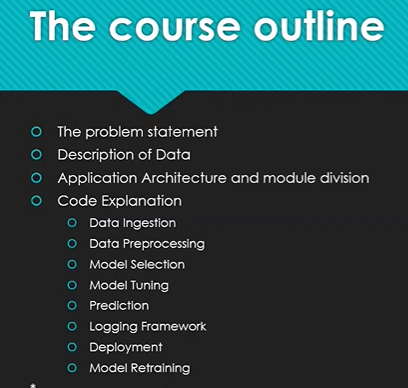

# Problem Statement 
* To create end to end automated machine learning solution where the user will only give dataset in recognizable formats and select the type of the problem, and the result will be the best performing hyper tuned machine learning model. The descriptive and graphical analysis of the data are also displayed. The user will also get privileges to choose the deployment option. (eg: AWS, GCP)
# Approach:
* You need to create number of scripts for different tasks like data-processing, for hyper-parameter tunning, etc.

# Architecture
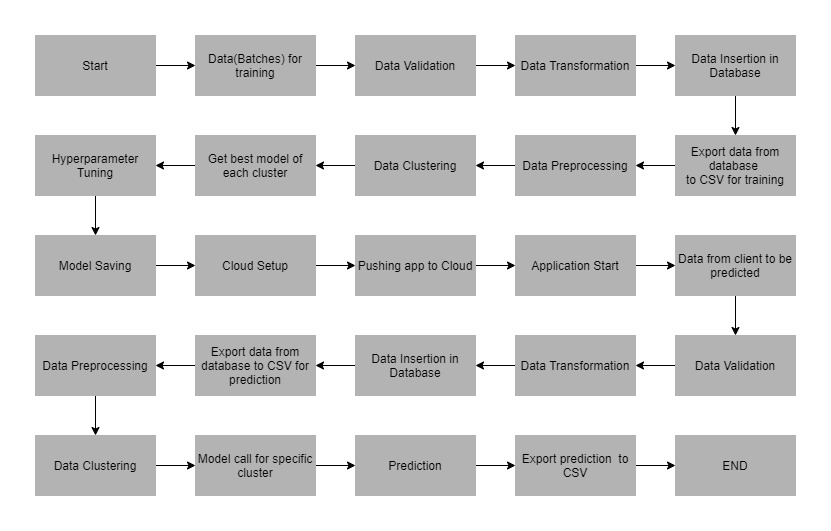

## Training Step (Main.py)
## Route 1 : Training
### Step 1 : Data Validation 
* #### Read Data from Client
* #### Data Validation (FileName, Number_of_Columns ,Missing_Whole_Column)
* #### Transform the Data According to DataBase Requirement(fill Nan with 'Null')
* #### Insert Data into DataBase
* #### Export Data to CSV

### Step 2 : Model Training
* #### Read Data From Exported CSV file
* #### Data Pre-Processing (Missing values , Categorical values etc)
* #### Form different cluster according to the Data
* #### Find Model for each Cluster
* #### Model Tuning
* #### Deploy Model

## Route 1 : Prediction
### Step 1 : Data Validation 
* #### Read Data from Client
* #### Data Validation (FileName, Number_of_Columns ,Missing_Whole_Column)
* #### Transform the Data According to DataBase Requirement(fill Nan with 'Null')
* #### Insert Data into DataBase
* #### Export Data to CSV

### Step 2 : Prediction
* Load the Models and predict

# main.py

In [ ]:
from wsgiref import simple_server
from flask import Flask, request, render_template
from flask import Response
import os
from flask_cors import CORS, cross_origin
from prediction_Validation_Insertion import pred_validation
from trainingModel import trainModel
from training_Validation_Insertion import train_validation
import flask_monitoringdashboard as dashboard
from predictFromModel import prediction
import json

os.putenv('LANG', 'en_US.UTF-8')
os.putenv('LC_ALL', 'en_US.UTF-8')

app = Flask(__name__)
dashboard.bind(app)
CORS(app)


@app.route("/", methods=['GET'])
@cross_origin()
def home():
    return render_template('index.html')

@app.route("/predict", methods=['POST'])
@cross_origin()
def predictRouteClient():
    try:
        if request.json is not None:
            path = request.json['filepath']

            pred_val = pred_validation(path) #object initialization

            pred_val.prediction_validation() #calling the prediction_validation function

            pred = prediction(path) #object initialization

            # predicting for dataset present in database
            path,json_predictions = pred.predictionFromModel()
            return Response("Prediction File created at !!!"  +str(path) +'and few of the predictions are '+str(json.loads(json_predictions) ))
        elif request.form is not None:
            path = request.form['filepath']

            pred_val = pred_validation(path) #object initialization

            pred_val.prediction_validation() #calling the prediction_validation function

            pred = prediction(path) #object initialization

            # predicting for dataset present in database
            path,json_predictions = pred.predictionFromModel()
            return Response("Prediction File created at !!!"  +str(path) +'and few of the predictions are '+str(json.loads(json_predictions) ))
        else:
            print('Nothing Matched')
    except ValueError:
        return Response("Error Occurred! %s" %ValueError)
    except KeyError:
        return Response("Error Occurred! %s" %KeyError)
    except Exception as e:
        return Response("Error Occurred! %s" %e)



@app.route("/train", methods=['POST'])
@cross_origin()
def trainRouteClient():

    try:
        if request.json['folderPath'] is not None:
            path = request.json['folderPath']

            train_valObj = train_validation(path) #object initialization

            train_valObj.train_validation()#calling the training_validation function


            trainModelObj = trainModel() #object initialization
            trainModelObj.trainingModel() #training the model for the files in the table


    except ValueError:

        return Response("Error Occurred! %s" % ValueError)

    except KeyError:

        return Response("Error Occurred! %s" % KeyError)

    except Exception as e:

        return Response("Error Occurred! %s" % e)
    return Response("Training successfull!!")

port = int(os.getenv("PORT",5000))
if __name__ == "__main__":
    host = '0.0.0.0'
    #port = 5000
    httpd = simple_server.make_server(host, port, app)
    # print("Serving on %s %d" % (host, port))
    httpd.serve_forever()


### In main.py @approute('/train') :
* ### Give the Input File and Type of Problem

### Create a New folder and logger.py (Synchronus and Asynchronus Logging - asyniop Library)

### Create a New folder and train_validation_insertion.py

### Create training_schema.json

### create Regular Expression "['auto_model']+\.csv"

### Split File name and make use of csv

### To isert into database the Data Should be NULL , so fillna('NULL' , inplace=True)

### Establish a Connection with Database  and create a Table and insert the data.

### Create a CSV from Database which will help to train

### Create a Preprocessor.py and Apply Data Processing Steps 

### Applying Feature Scaling for X data

### Perform CLustering (Knee Locator from the Library) and add cluster Column to data and cluster to it

### For All the clusters Apply various algorithms

### Compare the Adjusted R square or AUC score or shiloutte Score and find the best Model that fits. Return best_model_name and best_model for all the clusters

## Perform the Same preprocessing steps for prediction

In [20]:
import pandas as pd
df = pd.read_csv("Fruits.csv")
df.head()

,Id,Name,Price,Stock
0,1,Apple,0.4,30
1,2,Avacado,0.5,25
2,3,Banana,0.6,20
3,4,Blackberry,0.4,50
4,5,Cherry,0.5,40


In [21]:
df.dtypes

Id         int64
Name      object
Price    float64
Stock      int64
dtype: object

In [1]:
import cassandra
print (cassandra.__version__)

3.25.0


In [14]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
        'secure_connect_bundle': 'M:\secure-connect-automldb.zip'
}
auth_provider = PlainTextAuthProvider('QTHrHUiIpBqCzdEARCwfPAyN', 'MIMI10nlWagbX5hjZGBheHm+vDrnSYhCOClA8+StvdLM2gw_TRu5UZRmuDlU7zKwBjvqwTzt0WIA-DfzHfD8NSlCc+HzEzl9w2zCoQABEenf9g+AKD_NhSa44vnNYovE')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

row = session.execute("select release_version from system.local").one()
if row:
    print(row[0])
else:
    print("An error occurred.")

4.0.0.6814


In [25]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
        'secure_connect_bundle': 'M:\secure-connect-automldb.zip'
}
auth_provider = PlainTextAuthProvider('QTHrHUiIpBqCzdEARCwfPAyN', 'MIMI10nlWagbX5hjZGBheHm+vDrnSYhCOClA8+StvdLM2gw_TRu5UZRmuDlU7zKwBjvqwTzt0WIA-DfzHfD8NSlCc+HzEzl9w2zCoQABEenf9g+AKD_NhSa44vnNYovE')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)

session  = cluster.connect('AutoMLKS')
row = session.execute("CREATE TABLE emp(emp_id int PRIMARY KEY , emp_name text );").one()
print(row)

None


In [26]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
        'secure_connect_bundle': 'M:\secure-connect-automldb.zip'
}
auth_provider = PlainTextAuthProvider('QTHrHUiIpBqCzdEARCwfPAyN', 'MIMI10nlWagbX5hjZGBheHm+vDrnSYhCOClA8+StvdLM2gw_TRu5UZRmuDlU7zKwBjvqwTzt0WIA-DfzHfD8NSlCc+HzEzl9w2zCoQABEenf9g+AKD_NhSa44vnNYovE')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)

session  = cluster.connect('AutoMLKS')
row = session.execute("insert into emp(emp_id , emp_name) values(12 , 'Sai');").one()
print(row)

None


In [27]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
        'secure_connect_bundle': 'M:\secure-connect-automldb.zip'
}
auth_provider = PlainTextAuthProvider('QTHrHUiIpBqCzdEARCwfPAyN', 'MIMI10nlWagbX5hjZGBheHm+vDrnSYhCOClA8+StvdLM2gw_TRu5UZRmuDlU7zKwBjvqwTzt0WIA-DfzHfD8NSlCc+HzEzl9w2zCoQABEenf9g+AKD_NhSa44vnNYovE')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)

session  = cluster.connect('AutoMLKS')
row = session.execute("select * from emp;").one()
print(row)

Row(emp_id=12, emp_name='Sai')


In [29]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {'secure_connect_bundle': 'M:\secure-connect-automldb.zip'}
auth_provider = PlainTextAuthProvider('QTHrHUiIpBqCzdEARCwfPAyN', 'MIMI10nlWagbX5hjZGBheHm+vDrnSYhCOClA8+StvdLM2gw_TRu5UZRmuDlU7zKwBjvqwTzt0WIA-DfzHfD8NSlCc+HzEzl9w2zCoQABEenf9g+AKD_NhSa44vnNYovE')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)

session  = cluster.connect('AutoMLKS')
row = session.execute("CREATE TABLE Fruits(Id int PRIMARY KEY , Name text , Price float , Stock int );").one()
print(row)

None


In [28]:
df.head()

,Id,Name,Price,Stock
0,1,Apple,0.4,30
1,2,Avacado,0.5,25
2,3,Banana,0.6,20
3,4,Blackberry,0.4,50
4,5,Cherry,0.5,40


In [55]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
        'secure_connect_bundle': 'M:\secure-connect-automldb.zip'
}
auth_provider = PlainTextAuthProvider('QTHrHUiIpBqCzdEARCwfPAyN', 'MIMI10nlWagbX5hjZGBheHm+vDrnSYhCOClA8+StvdLM2gw_TRu5UZRmuDlU7zKwBjvqwTzt0WIA-DfzHfD8NSlCc+HzEzl9w2zCoQABEenf9g+AKD_NhSa44vnNYovE')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)

session  = cluster.connect('AutoMLKS')
row = session.execute("insert into Fruits(Id , Name , Price , Stock) values( 1,'Apple',0.4,30);").one()
print(row)

None


In [103]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
        'secure_connect_bundle': 'M:\secure-connect-automldb.zip'
}
auth_provider = PlainTextAuthProvider('QTHrHUiIpBqCzdEARCwfPAyN', 'MIMI10nlWagbX5hjZGBheHm+vDrnSYhCOClA8+StvdLM2gw_TRu5UZRmuDlU7zKwBjvqwTzt0WIA-DfzHfD8NSlCc+HzEzl9w2zCoQABEenf9g+AKD_NhSa44vnNYovE')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)

session  = cluster.connect('AutoMLKS')
row = session.execute("select * from Fruits;").one()
print(row)

Row(id=1, name='Apple', price=0.4000000059604645, stock=30)


## ML

In [ ]:
from flask import Flask, render_template, request, jsonify

app = Flask(__name__)

@app.route('/AutoML', methods=['POST']) # for calling the API from Postman/SOAPUI
def AutoML():
    if (request.method=='POST'):
        folder_path=request.json['folder_path']

        result = " Name : " + str(name) + " Phno : " + str(phno) + " email : " + str(email)
        return jsonify(result)


if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Jul/2021 18:06:33] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [29/Jul/2021 18:06:33] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [29/Jul/2021 18:09:40] "POST /bharadwaja1 HTTP/1.1" 400 -
127.0.0.1 - - [29/Jul/2021 18:10:21] "POST /bharadwaja1 HTTP/1.1" 200 -


In [16]:

import logging as lg


class Logger:
    def __init__(self):
        pass

    def log(self , from_file , log_type , log_message):
        lg.basicConfig(filename="test.log", level=lg.INFO, format = '%(name)s - %(asctime)s - %(levelname)s - %(message)s')
        logger = lg.getLogger(from_file)
        if log_type == "INFO" :
            logger.info( log_message + "\n")
        elif log_type == "ERROR" :
            logger.error( log_message + "\n")
            



In [17]:
Logger().log( "missing_values" , "INFO" , "Missing values are Handled")

In [18]:
Logger().log( "missing_values" , "ERROR" , "Missing values cant be  Handled")

In [ ]:
logger1 = logging.getLogger('user1')
logger2 = logging.getLogger('user2')
logger1.info('this is from user1 info')
logger2.debug('This is from user2 debug')

In [ ]:
from datetime import datetime
import logging as lg


class Logger:
    def __init__(self):
        pass

    def log(self , from_file , log_type , log_message):
        logger = logging.getLogger(from_file)
        if log_type == "INFO" :
            lg.basicConfig(filename="test.log", level=lg.INFO, format = '%(name)s - %(asctime)s - %(levelname)s - %(message)s')
            lg.info( log_message + "\n")
        elif log_type == "ERROR" :
            lg.basicConfig(filename="test.log", level=lg.ERROR, format = '%(name)s - %(asctime)s - %(levelname)s - %(message)s')
            lg.error( log_message + "\n")
            



In [23]:
import pandas as pd
df = pd.read_csv("Train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
d = df.dtypes
f = d[d=='float'].index

In [26]:
for i in f:
    print(i,df[i].unique())

Age [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Fare [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  

In [29]:
d = df.dtypes
integer = d[d=='int64'].index
integer

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [32]:
for i in integer:
    print(i,df[i].unique())

PassengerId [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [2]:
df.shape

(891, 12)

In [3]:
d = df.dtypes
index = d[d=="object"].index
index

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [4]:
for i in index:
    print(i,len(df[i].unique()))
    if len(df[i].unique())>20:
        df.drop(i,axis=1,inplace=True)

Name 891
Sex 2
Ticket 681
Cabin 148
Embarked 4


In [5]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
df.shape

(891, 9)

In [7]:
d = df.dtypes
index = d[d=="object"].index
index

Index(['Sex', 'Embarked'], dtype='object')

In [8]:
for i in index:
    ordinal_labels=df.groupby([i])['Survived'].mean().sort_values().index
    ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
    df[i] = df[i].map(ordinal_labels2)


In [44]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,2.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0.0
887,888,1,1,1,19.0,0,0,30.0000,0.0
888,889,0,3,1,NaN,1,2,23.4500,0.0
889,890,1,1,0,26.0,0,0,30.0000,2.0


In [45]:
import pandas as pd
df = pd.read_csv("Train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df["Name"].value_counts()

Kelly, Mr. James               1
McMahon, Mr. Martin            1
Thayer, Mr. John Borland Jr    1
Hale, Mr. Reginald             1
Tomlin, Mr. Ernest Portage     1
                              ..
Johnston, Mr. Andrew G         1
Otter, Mr. Richard             1
Jensen, Mr. Svend Lauritz      1
O'Driscoll, Miss. Bridget      1
McCoy, Mr. Bernard             1
Name: Name, Length: 891, dtype: int64

In [56]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [57]:
df["Cabin"].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
C22 C26        3
              ..
D7             1
B80            1
C110           1
B79            1
C82            1
Name: Cabin, Length: 147, dtype: int64

## Handling Categorical

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
data_types = df.dtypes
categorical = data_types[data_types=="object"].index
integer = data_types[data_types=="int64"].index

In [43]:
for i in categorical:
    if len(df[i].unique())>20:
        print(i,len(df[i].unique()))
        df.drop([i],axis=1,inplace=True)

Name 891
Ticket 681
Cabin 148


In [49]:
integer

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [51]:
for i in integer:
    if len(df[i].unique())>20:
        print(i,len(df[i].unique()))
        df.drop([i],axis=1,inplace=True)

PassengerId 891


In [52]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [53]:
d = df.dtypes
index = d[d=="object"].index
index

Index(['Sex', 'Embarked'], dtype='object')

In [54]:
for i in index:
    ordinal_labels=df.groupby([i])['Survived'].mean().sort_values().index
    ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
    df[i] = df[i].map(ordinal_labels2)


In [55]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,NaN,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,2.0


In [ ]:
df.rename(columns={'Run1(ms)': 'output'}, inplace=True)

 # Auto ML

In [1]:
import pandas as pd
df = pd.read_csv("Clustering_CCGENERAL.csv")
#df.rename(columns={'Run1(ms)': 'output'}, inplace=True)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
index = df.dtypes[df.dtypes == "object"].index
index

Index([], dtype='object')

## Missing

In [2]:
import numpy as np
#from Logging.Logger import Logger


class check_missing_values:
    def __init__(self):
        pass
    def handle_missing(self,df):

        try:
            self.df1 = df.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))
            #Logger().log("missing_values.py", "INFO", "Missing values handled Successfully")
            return self.df1
        except Exception as e:
            #Logger().log("missing_values.py", "ERROR", e)
            print(e)

In [3]:
missing_handled_df = check_missing_values().handle_missing(df)
missing_handled_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [4]:
missing_handled_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,2019.019279,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,232.605728,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
missing_handled_df.shape

(8950, 18)

## Categorical using Target Guided Encoding

In [6]:
type_of_problem = "Clustering"

In [8]:
import pandas as pd

class Categorical:
    def __init__(self):
        pass
    def Handle(self,missing_handled_df,type_of_problem):
        
        if "output" in missing_handled_df.columns:
        
            self.df = missing_handled_df.drop(["output"],axis=1)
            y = missing_handled_df["output"]
            data_types = self.df.dtypes
            categorical = data_types[data_types == "object"].index
            integer = data_types[data_types == "int64"].index
            for i in categorical:
                if len(self.df[i].unique()) > 20:
                    #print(i, len(self.df[i].unique()))
                    self.df.drop([i], axis=1, inplace=True)
         
            d = self.df.dtypes
            index = d[d == "object"].index
            
            if type_of_problem == "Regression" :
                for i in index:
                    ordinal_labels = missing_handled_df.groupby([i])['output'].mean().sort_values().index
                    ordinal_labels2 = {k: i for i, k in enumerate(ordinal_labels, 0)}
                    self.df[i] = self.df[i].map(ordinal_labels2)

                output = pd.concat([self.df,y],axis=1)
                
            elif type_of_problem == "Classification" :
                for i in index:
                    d = self.df[i].value_counts().to_dict()
                    self.df[i] = self.df[i].map(d)
                
                d = {k:v  for v,k in enumerate(y.unique())}
                y = y.map(d)
                    
                output = pd.concat([self.df,y],axis=1)
                    
                    
                
            
        else:
            self.df = missing_handled_df
            data_types = self.df.dtypes
            categorical = data_types[data_types == "object"].index
            integer = data_types[data_types == "int64"].index
            for i in categorical:
                if len(self.df[i].unique()) > 20:
                    #print(i, len(self.df[i].unique()))
                    self.df.drop([i], axis=1, inplace=True)
            
            d = self.df.dtypes
            index = d[d == "object"].index
            for i in index:
                
                d = self.df[i].value_counts().to_dict()
                self.df[i] = self.df[i].map(d)
            
            output = self.df
            
            
        return output 

In [9]:
categorical_handled_df = Categorical().Handle(missing_handled_df,type_of_problem)

In [10]:
categorical_handled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,2019.019279,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Outliers

In [11]:
class Outliers:
    def __init__(self):
        pass
    def Handle(self,categorical_handled_df):
        self.df = categorical_handled_df.copy()
        for Column_Name in self.df.columns:
            IQR = self.df[Column_Name].quantile(0.75) - self.df[Column_Name].quantile(0.25)
            lower_boundary = self.df[Column_Name].quantile(0.25)-(1.5 * IQR)
            upper_boundary = self.df[Column_Name].quantile(0.75)+(1.5 * IQR)
            #print(Column_Name,IQR,lower_boundary,upper_boundary)

            self.df.loc[self.df[Column_Name]>=upper_boundary,Column_Name]=upper_boundary
            self.df.loc[self.df[Column_Name]<=lower_boundary,Column_Name]=lower_boundary
        return self.df

In [12]:
outliers_handled_df = Outliers().Handle(categorical_handled_df)

## Scaling 

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

class Scaling:
    def __init__(self):
        pass
    def Features(self,categorical_handled_df):
        if "output" in missing_handled_df.columns:
            self.df = categorical_handled_df
            X = self.df.drop(["output"],axis=1)
            X_Columns = X.columns
            y = self.df[["output"]]
            scaler = StandardScaler()
            X_std = pd.DataFrame(scaler.fit_transform(X), columns = X_Columns)
            
            min_max=MinMaxScaler()
            X_std_MinMax = pd.DataFrame(scaler.fit_transform(X_std), columns = X_Columns)
            
            return X_std_MinMax,y
            
        else:
            self.df = categorical_handled_df
            scaler = StandardScaler()
            X_std = pd.DataFrame(scaler.fit_transform(self.df), columns = self.df.columns)
            
            min_max=MinMaxScaler()
            X_std_MinMax = pd.DataFrame(scaler.fit_transform(X_std), columns = self.df.columns)
            
            return X_std_MinMax,None
            
        
        

In [14]:
outliers_handled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.722222,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,1798.336539,0.000000,12.0
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [15]:
X_scaled,y = Scaling().Features(outliers_handled_df)

In [16]:
X_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.877821,-1.021875,-0.729687,-0.692383,-0.505216,-0.673507,-0.806490,-0.722749,-0.707313,-0.730084,-0.697293,-0.737970,-1.010577,-0.899859,-0.778390,-0.629277,0.0
1,1.178546,-0.202708,-0.838160,-0.692383,-0.746029,2.115343,-1.221758,-0.722749,-0.916995,0.717792,0.473089,-0.891333,0.762697,2.165375,0.896334,0.973961,0.0
2,0.718487,0.616459,0.040957,0.818320,-0.746029,-0.673507,1.269843,2.210909,-0.916995,-0.730084,-0.697293,0.028848,0.910470,-0.569653,0.097320,-0.629277,0.0
3,0.179623,-1.886552,0.866246,2.128108,-0.746029,-0.467401,-1.014125,-0.396788,-0.916995,-0.247460,-0.404697,-0.814651,0.910470,-1.058417,2.199727,-0.629277,0.0
4,-0.372561,0.616459,-0.819967,-0.661121,-0.746029,-0.673507,-1.014125,-0.396788,-0.916995,-0.730084,-0.697293,-0.814651,-0.951468,-0.525443,-0.589377,-0.629277,0.0


## PCA

In [17]:
!pip install -U kaleido

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from kneed import KneeLocator
import pickle
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
import plotly.graph_objects as go
py.offline.init_notebook_mode(connected = True)
cf.go_offline()
import plotly.express as px



class PCA_dimensionality:
    def __init__(self):
        pass
    def PCA_fit_transform(self,X,y):
        
        p = PCA()
        new_data = p.fit_transform(X)
        fig = px.line(x = range(1, len(X.columns) + 1) , y = np.cumsum(p.explained_variance_ratio_), labels = { 'x' :"Number of Components", 'y' :"Explained Variance Ratio"},title="PCA : The KNEE Method")
        #new_data.iplot(np.cumsum(p.explained_variance_ratio_),xTitle = 'Number of Components' , yTitle = 'Explained Variance Ratio', title='PCA : The KNEE Method')  # creating the graph between EVR and the number of Components
        
        #plt.title('PCA : The KNEE Method')
        #plt.xlabel('Number of Components')
        #plt.ylabel('Explained Variance Ratio')
        #plt.show()
        #plt.savefig('PCA_KNEE.PNG') # saving the KNEE plot locally

        # finding the value of the optimum cluster programmatically

        kn = KneeLocator(range(1, len(X.columns) + 1), np.cumsum(p.explained_variance_ratio_), curve='concave',
                     direction='increasing')
        knee = kn.knee
        
        #fig = px.scatter( x = 27 , y = np.cumsum(p.explained_variance_ratio_))
        fig.add_vrect(x0 = knee,x1=knee)
        fig.write_image("PCA_KNEE_PLotly.png")
        fig.show()
        pca = PCA(n_components=knee)
        PCA_data = pca.fit_transform(X)
        data = pd.DataFrame(PCA_data)
        with open('PCA_model.pickle', 'wb') as f:
            pickle.dump(pca,f)
        return knee , data , y



In [19]:
knee, PCA_X , y = PCA_dimensionality().PCA_fit_transform(X_scaled,y)

In [20]:
knee

6

In [21]:
PCA_X.shape

(8950, 6)

## Clustering

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
import plotly.graph_objects as go
py.offline.init_notebook_mode(connected = True)
cf.go_offline()
import plotly.express as px



class Clustering:
    def __init__(self):
        pass
    
    def fit(self,PCA_X , y):
  
        
        ## K-Means
        wcss = []
        for i in range (1,11):
            kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
            kmeans.fit(PCA_X) # fitting the data to the KMeans Algorithm
            wcss.append(kmeans.inertia_)
            
        fig = px.line(x=range(1, 11), y=wcss,
                         labels={'x': "Number of clusters", 'y': "WCSS"},
                         title="K-Means : The Elbow Method")
        
        
        self.kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
        fig.add_vrect(x0=self.kn.knee, x1=self.kn.knee)
        fig.write_image("Result/Clustering_Elbow_Plotly.png")
        fig.show()
        # print(self.kn.knee)
        kmeans=KMeans(n_clusters=self.kn.knee,init='k-means++',random_state=42) 
        kmeans.fit_transform(PCA_X)
        labels = kmeans.fit_predict(PCA_X)

        
        
        return  PCA_X , y , pd.DataFrame(labels,columns=["cluster"])
        
        
    
    

 PCA_X , y , labels = Clustering().fit(PCA_X , y)

labels.cluster.unique()

## Cluster_Models

class Cluster_Models:
    def __init__(self):
        pass
    def fit(self, PCA_X , y , labels, type_of_problem):
        cluster = []
        cluster_best_model = []
        if type_of_problem == "Regression":
            df = pd.concat([PCA_X , y , labels],axis=1)
            for i in labels.cluster.unique():
                df_cluster = df[df["cluster"] == i]
                X = df_cluster.drop(["output","cluster"],axis=1)
                y = df_cluster["output"]
                Regression().fit(x_train, x_test, y_train, y_test)
                
                
            

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test , y_train , y_test = train_test_split(PCA_X, y , test_size=0.30, random_state=355)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 9)
(150, 9)
(350, 1)
(150, 1)


## Linear Regression

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics
import statsmodels.api as sm


class Regression:
    def __init__(self):
        self.train = []
        self.test = []
    def fit(self,x_train, x_test, y_train, y_test):
        data = []
        model = []
        
        l = ['LinearRegression',
              'lasso_reg',
              'ridge_model',
              'elasticnet_reg']

        # LinearRegression

        regression = LinearRegression()
        regression_model = regression.fit(x_train, y_train)
        model.append(regression_model)
        score_train = regression.score(x_train, y_train)
        self.train.append(score_train)
        score_test = regression.score(x_test, y_test)
        y_pred_Lreg = regression.predict(x_test)
     
        with open('LinearRegression_Model.pickle', 'wb') as f:
            pickle.dump(regression,f)
            
        data.append(({
                "Score" : score_test ,
                'MSE': metrics.mean_squared_error(y_test, y_pred_Lreg),
                'RMSE': metrics.mean_squared_error(y_test, y_pred_Lreg,squared=False),
                'MAE': metrics.mean_absolute_error(y_test, y_pred_Lreg),
                'R-Squared': metrics.r2_score(y_test, y_pred_Lreg),
               # "Model_Download": '<a href="//static/XGBoost_Model.pickle" download="XGBoost_Model.pickle">XGBoost_Model  </a>'

            }))


        # Lasso Regularization

        lasscv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
        lasscv.fit(x_train, y_train)
        lasso_reg = Lasso(lasscv.alpha_)
        lasso_reg_model = lasso_reg.fit(x_train, y_train)
        model.append(lasso_reg_model)
        score_train = lasso_reg.score(x_train, y_train)
        self.train.append(score_train)
        score_test_Lasso = lasso_reg.score(x_test, y_test)
        y_pred_Lassoreg = lasso_reg_model.predict(x_test)
        with open('LassoRegression_Model.pickle', 'wb') as f:
            pickle.dump(lasso_reg_model,f)
            
        data.append(({
                "Score" : score_test_Lasso ,
                'MSE': metrics.mean_squared_error(y_test, y_pred_Lassoreg),
                'RMSE': metrics.mean_squared_error(y_test, y_pred_Lassoreg,squared=False),
                'MAE': metrics.mean_absolute_error(y_test, y_pred_Lassoreg),
                'R-Squared': metrics.r2_score(y_test, y_pred_Lassoreg),
               # "Model_Download": '<a href="//static/XGBoost_Model.pickle" download="XGBoost_Model.pickle">XGBoost_Model  </a>'

            }))
        

        # Ridge
        ridgecv = RidgeCV(alphas=(0.1, 1.0, 10.0), cv=10, normalize=True)
        ridgecv.fit(x_train, y_train)
        ridge = Ridge(alpha=ridgecv.alpha_)
        ridge_model = ridge.fit(x_train, y_train)
        model.append(ridge_model)
        score_train = ridge_model.score(x_train, y_train)
        self.train.append(score_train)
        score_test_Ridge = ridge_model.score(x_test, y_test)
        y_pred_Ridgereg = ridge_model.predict(x_test)
       
        with open('RideRegression_Model.pickle', 'wb') as f:
            pickle.dump(ridge_model,f)
            
        data.append(({
                "Score" : score_test_Ridge ,
                'MSE': metrics.mean_squared_error(y_test, y_pred_Ridgereg),
                'RMSE': metrics.mean_squared_error(y_test, y_pred_Ridgereg,squared=False),
                'MAE': metrics.mean_absolute_error(y_test, y_pred_Ridgereg),
                'R-Squared': metrics.r2_score(y_test, y_pred_Ridgereg),
               # "Model_Download": '<a href="//static/XGBoost_Model.pickle" download="XGBoost_Model.pickle">XGBoost_Model  </a>'

            }))
        
     
        
        
        # ElasticNet
        elasticCV = ElasticNetCV(alphas = None, cv =10)
        elasticCV.fit(x_train, y_train)
        elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
        elasticnet_reg_model = elasticnet_reg.fit(x_train, y_train)
        model.append(elasticnet_reg_model)
        score_train = elasticnet_reg.score(x_train, y_train)
        self.train.append(score_train)
        score_test_Elasticnetreg = elasticnet_reg.score(x_test, y_test)
        y_pred_Elasticnetreg = elasticnet_reg_model.predict(x_test)
       
        with open('ElasticNetRegression.pickle', 'wb') as f:
            pickle.dump(elasticnet_reg_model,f)
            
        data.append(({
                "Score" : score_test_Elasticnetreg ,
                'MSE': metrics.mean_squared_error(y_test, y_pred_Elasticnetreg),
                'RMSE': metrics.mean_squared_error(y_test, y_pred_Elasticnetreg ,squared=False),
                'MAE': metrics.mean_absolute_error(y_test, y_pred_Elasticnetreg),
                'R-Squared': metrics.r2_score(y_test, y_pred_Elasticnetreg),
               # "Model_Download": '<a href="//static/XGBoost_Model.pickle" download="XGBoost_Model.pickle">XGBoost_Model  </a>'

            }))
        
        result = pd.DataFrame(data=data, columns=['Score', 'MSE', 'RMSE',
                                                       'MAE', 'R-Squared'],
                                   index=['Linear_Regression', 'Lasso_Regression',
                                          'Ridge_Regression','ElasticNet_Regression'])
        
        #m = max(self.test)
        #max_index = self.test.index(m)
        html = result.to_html(escape=False)
        

        return html

In [50]:
Regression().fit(x_train, x_test, y_train, y_test)

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Score</th>\n      <th>MSE</th>\n      <th>RMSE</th>\n      <th>MAE</th>\n      <th>R-Squared</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Linear_Regression</th>\n      <td>0.988723</td>\n      <td>6.164174</td>\n      <td>2.482775</td>\n      <td>1.892757</td>\n      <td>0.988723</td>\n    </tr>\n    <tr>\n      <th>Lasso_Regression</th>\n      <td>0.988714</td>\n      <td>6.169005</td>\n      <td>2.483748</td>\n      <td>1.893425</td>\n      <td>0.988714</td>\n    </tr>\n    <tr>\n      <th>Ridge_Regression</th>\n      <td>0.988721</td>\n      <td>6.165201</td>\n      <td>2.482982</td>\n      <td>1.892872</td>\n      <td>0.988721</td>\n    </tr>\n    <tr>\n      <th>ElasticNet_Regression</th>\n      <td>0.988172</td>\n      <td>6.464932</td>\n      <td>2.542623</td>\n      <td>1.941241</td>\n      <td>0.988172</td>\n    </tr>\n  </tbody>\n</table>'

## Prediction

In [251]:
import pickle
PCA_model = pickle.load(open('PCA_model.pickle', 'rb'))
loaded_model = pickle.load(open('finalized_model.pickle', 'rb'))

In [252]:
import pandas as pd
df = pd.read_csv("Hp_train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,output
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [253]:
missing_handled_df = check_missing_values().handle_missing(df)
categorical_handled_df = Categorical().Handle(missing_handled_df)
outliers_handled_df = Outliers().Handle(categorical_handled_df)
X_scaled,y = Scaling().Features(outliers_handled_df)

In [254]:
PCA_X = PCA_model.fit_transform(X_scaled)

In [255]:
PCA_X

array([[ 2.8712547 , -0.4128401 , -2.43343835, ...,  0.08204101,
         0.3443173 ,  0.08151582],
       [-0.57204269, -0.33506725,  2.18081093, ...,  0.24702856,
        -0.97879053, -0.31374124],
       [ 3.35045701, -0.24133359, -1.71583563, ..., -0.25433595,
        -0.60676322, -0.19058104],
       ...,
       [ 1.6082064 ,  2.89605751, -1.5444072 , ..., -1.40927735,
        -0.90046561,  0.9949039 ],
       [-2.91077102, -1.59620286,  0.94916063, ..., -0.8945074 ,
        -0.36144048,  0.66850955],
       [-1.28023554, -0.37419255,  1.40610063, ...,  0.59207067,
         0.89348136, -0.12423137]])

In [256]:
y_predicted = loaded_model.predict(PCA_X)


In [257]:
y

,output
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0


In [258]:
PCA_X.shape

(1460, 27)

In [259]:
y.shape

(1460, 1)

In [260]:
y_predicted.shape

(1460,)

In [261]:
from sklearn.metrics import mean_squared_error

In [262]:
mean_squared_error(y,y_predicted) 

1136595312.8962781

## Classificaton

In [61]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics  import roc_auc_score,accuracy_score
sns.set()

class Classification:
    def __init__(self):
        pass
    def fit(self,x_train, x_test, y_train, y_test):
        self.L = ["Logistic_Regression","Random_Forest","XGBoost"]
        self.Model = []
        self.Score = []
        try:
            
            ## Logistic Regression
            
            self.log_reg = LogisticRegression()
            self.param_grid_Logistic = {

                'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                'tol' : [ 0.01 , 0.001 , 0.0001 ],
                'max_iter': [100,1000,10000]

            }
            # Creating an object of the Grid Search class
            self.grid= GridSearchCV(estimator = self.log_reg, param_grid = self.param_grid_Logistic, verbose=3,cv=5)
            # finding the best parameters
            self.grid.fit(x_train, y_train)

            # extracting the best parameters
            self.penalty = self.grid.best_params_['penalty']
            self.tol = self.grid.best_params_['tol']
            self.max_iter = self.grid.best_params_['max_iter']

            # creating a new model with the best parameters
            self.log_reg = XGBClassifier(penalty=self.penalty, tol=self.tol, max_iter=self.max_iter)
            # training the mew model
            self.log_reg.fit(x_train, y_train)
            self.prediction_log_reg = self.log_reg.predict(x_test) 
            
            self.Model.append(self.log_reg)

            if len(y_test["output"].unique()) == 1: #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
                self.log_reg_score = accuracy_score(y_test, self.prediction_log_reg)
                self.Score.append(self.log_reg_score)
            else:
                self.log_reg_score = roc_auc_score(y_test, self.prediction_log_reg) 
                self.Score.append(self.log_reg_score)
            
            
            
            
            ## Random Forest
            self.clf = RandomForestClassifier()
            
            self.param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 4, 1), "max_features": ['auto', 'log2']}

            #Creating an object of the Grid Search class
            self.grid = GridSearchCV(estimator=self.clf, param_grid=self.param_grid, cv=5,  verbose=3)
            #finding the best parameters
            self.grid.fit(x_train, y_train)

            #extracting the best parameters
            self.criterion = self.grid.best_params_['criterion']
            self.max_depth = self.grid.best_params_['max_depth']
            self.max_features = self.grid.best_params_['max_features']
            self.n_estimators = self.grid.best_params_['n_estimators']

            #creating a new model with the best parameters
            self.clf = RandomForestClassifier(n_estimators=self.n_estimators, criterion=self.criterion,
                                              max_depth=self.max_depth, max_features=self.max_features)
            # training the mew model
            self.clf.fit(x_train, y_train)
            self.prediction_random_forest = self.clf.predict(x_test) # prediction using the Random Forest Algorithm
            
            self.Model.append(self.clf)

            if len(y_test["output"].unique()) == 1:#if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
                self.random_forest_score = accuracy_score(y_test,self.prediction_random_forest)
                self.Score.append(self.random_forest_score)
            else:
                self.random_forest_score = roc_auc_score(y_test, self.prediction_random_forest) 
                self.Score.append(self.random_forest_score)
            
            
            ### XG BOOST
            
            self.xgb = XGBClassifier(objective='binary:logistic')
            self.param_grid_xgboost = {

                'learning_rate': [0.5, 0.1, 0.01, 0.001],
                'max_depth': [3, 5, 10, 20],
                'n_estimators': [10, 50, 100, 200]

            }
            # Creating an object of the Grid Search class
            self.grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),self.param_grid_xgboost, verbose=3,cv=5)
            # finding the best parameters
            self.grid.fit(x_train, y_train)

            # extracting the best parameters
            self.learning_rate = self.grid.best_params_['learning_rate']
            self.max_depth = self.grid.best_params_['max_depth']
            self.n_estimators = self.grid.best_params_['n_estimators']

            # creating a new model with the best parameters
            self.xgb = XGBClassifier(learning_rate=self.learning_rate, max_depth=self.max_depth, n_estimators=self.n_estimators)
            # training the mew model
            self.xgb.fit(x_train, y_train)
            self.prediction_xgboost = self.xgb.predict(x_test) # Predictions using the XGBoost Model
            
            self.Model.append(self.xgb)

            if len(y_test["output"].unique()) == 1: #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
                self.xgboost_score = accuracy_score(y_test, self.prediction_xgboost)
                self.Score.append(self.xgboost_score)
            else:
                self.xgboost_score = roc_auc_score(y_test, self.prediction_xgboost) # AUC for XGBoost
                self.Score.append(self.xgboost_score)
                
            index = self.Score.index(max(self.Score))
            best_algo = self.L[index]
            best_Score = self.Score[index]
            best_Model = self.Model[index]
            
            with open('finalized_model_Classification.pickle', 'wb') as f:
                pickle.dump(self.Model[index], f)
            
            return best_algo, best_Score ,  best_Model , self.Score
                 
            
        except Exception as e:
            print(e)
          
                

In [62]:
best_algo, best_Score ,  best_Model , Score_List = Classification().fit(x_train, x_test, y_train, y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ..max_iter=100, penalty=l1, tol=0.01;, score=nan total time=   0.0s
[CV 2/5] END ..max_iter=100, penalty=l1, tol=0.01;, score=nan total time=   0.0s
[CV 3/5] END ..max_iter=100, penalty=l1, tol=0.01;, score=nan total time=   0.0s
[CV 4/5] END ..max_iter=100, penalty=l1, tol=0.01;, score=nan total time=   0.0s
[CV 5/5] END ..max_iter=100, penalty=l1, tol=0.01;, score=nan total time=   0.0s
[CV 1/5] END .max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END .max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END .max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 4/5] END .max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 5/5] END .max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 1/5] END max_iter=100, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END max_iter=100, penalty=l1, tol=0.00

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedW

[CV 5/5] END max_iter=100, penalty=l2, tol=0.0001;, score=0.222 total time=   0.0s
[CV 1/5] END max_iter=100, penalty=elasticnet, tol=0.01;, score=nan total time=   0.0s
[CV 2/5] END max_iter=100, penalty=elasticnet, tol=0.01;, score=nan total time=   0.0s
[CV 3/5] END max_iter=100, penalty=elasticnet, tol=0.01;, score=nan total time=   0.0s
[CV 4/5] END max_iter=100, penalty=elasticnet, tol=0.01;, score=nan total time=   0.0s
[CV 5/5] END max_iter=100, penalty=elasticnet, tol=0.01;, score=nan total time=   0.0s
[CV 1/5] END max_iter=100, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END max_iter=100, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END max_iter=100, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 4/5] END max_iter=100, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 5/5] END max_iter=100, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 1/5] END max_iter=100, penalty=elastic

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:619: Fi

[CV 4/5] END .max_iter=1000, penalty=l1, tol=0.01;, score=nan total time=   0.0s
[CV 5/5] END .max_iter=1000, penalty=l1, tol=0.01;, score=nan total time=   0.0s
[CV 1/5] END max_iter=1000, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 1/5] END max_iter=1000, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END max_iter=1

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedW

[CV 2/5] END max_iter=1000, penalty=none, tol=0.01;, score=0.286 total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=none, tol=0.01;, score=0.179 total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=none, tol=0.01;, score=0.259 total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=none, tol=0.01;, score=0.222 total time=   0.0s
[CV 1/5] END max_iter=1000, penalty=none, tol=0.001;, score=0.429 total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=none, tol=0.001;, score=0.286 total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=none, tol=0.001;, score=0.179 total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=none, tol=0.001;, score=0.259 total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=none, tol=0.001;, score=0.222 total time=   0.0s
[CV 1/5] END max_iter=1000, penalty=none, tol=0.0001;, score=0.429 total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=none, tol=0.0001;, score=0.286 total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=none, tol=0.0001;, score=0.179 

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bha

[CV 4/5] END max_iter=10000, penalty=l2, tol=0.01;, score=0.296 total time=   0.0s
[CV 5/5] END max_iter=10000, penalty=l2, tol=0.01;, score=0.222 total time=   0.0s
[CV 1/5] END max_iter=10000, penalty=l2, tol=0.001;, score=0.500 total time=   0.0s
[CV 2/5] END max_iter=10000, penalty=l2, tol=0.001;, score=0.286 total time=   0.0s
[CV 3/5] END max_iter=10000, penalty=l2, tol=0.001;, score=0.179 total time=   0.0s
[CV 4/5] END max_iter=10000, penalty=l2, tol=0.001;, score=0.296 total time=   0.0s
[CV 5/5] END max_iter=10000, penalty=l2, tol=0.001;, score=0.222 total time=   0.0s
[CV 1/5] END max_iter=10000, penalty=l2, tol=0.0001;, score=0.500 total time=   0.0s
[CV 2/5] END max_iter=10000, penalty=l2, tol=0.0001;, score=0.286 total time=   0.0s
[CV 3/5] END max_iter=10000, penalty=l2, tol=0.0001;, score=0.179 total time=   0.0s
[CV 4/5] END max_iter=10000, penalty=l2, tol=0.0001;, score=0.296 total time=   0.0s
[CV 5/5] END max_iter=10000, penalty=l2, tol=0.0001;, score=0.222 total ti

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bha

[CV 3/5] END max_iter=10000, penalty=none, tol=0.001;, score=0.179 total time=   0.0s
[CV 4/5] END max_iter=10000, penalty=none, tol=0.001;, score=0.259 total time=   0.0s
[CV 5/5] END max_iter=10000, penalty=none, tol=0.001;, score=0.222 total time=   0.0s
[CV 1/5] END max_iter=10000, penalty=none, tol=0.0001;, score=0.429 total time=   0.0s
[CV 2/5] END max_iter=10000, penalty=none, tol=0.0001;, score=0.286 total time=   0.0s
[CV 3/5] END max_iter=10000, penalty=none, tol=0.0001;, score=0.179 total time=   0.0s
[CV 4/5] END max_iter=10000, penalty=none, tol=0.0001;, score=0.259 total time=   0.0s
[CV 5/5] END max_iter=10000, penalty=none, tol=0.0001;, score=0.222 total time=   0.0s
[14:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_iter", "penalty", "tol" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters 

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning:

One or more of the test scores are non-finite: [       nan        nan        nan 0.29656085 0.29656085 0.29656085
        nan        nan        nan 


multi_class must be in ('ovo', 'ovr')


TypeError: 'NoneType' object is not iterable

In [183]:
best_algo

'Random_Forest'

In [184]:
best_Score

0.7451015855790679

In [185]:
Score_List

[0.7150177850123591, 0.7451015855790679, 0.7170977271357087]

In [187]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,best_Model.predict(x_test))

0.7686567164179104

In [190]:
roc_auc_score(y_test,best_Model.predict(x_test))

0.7451015855790679

In [191]:
import pickle
loaded_model = pickle.load(open('finalized_model_Classification.pickle', 'rb'))

In [192]:
y_predicted = loaded_model.predict(x_test)

In [193]:
accuracy_score(y_test,y_predicted)

0.7686567164179104

In [194]:
roc_auc_score(y_test,y_predicted)

0.7451015855790679

## Clustering

In [22]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test = train_test_split(PCA_X, test_size=0.30, random_state=355)
print(x_train.shape)
print(x_test.shape)

(6265, 6)
(2685, 6)


In [309]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np


class Clustering:
    def __init__(self):
        pass
    
    def fit(self,x_train, x_test):
        L = ["K-Means" , "Hierarchial"]
        Score = []
        Model = []
        
        ## K-Means
        wcss = []
        for i in range (1,11):
            kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
            kmeans.fit(x_train) # fitting the data to the KMeans Algorithm
            wcss.append(kmeans.inertia_)
        plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
        plt.title('The Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        #plt.show()
        plt.savefig('K-Means_Elbow.PNG') # saving the elbow plot locally
        # finding the value of the optimum cluster programmatically
        self.kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
        # print(self.kn.knee)
        kmeans=KMeans(n_clusters=self.kn.knee,init='k-means++',random_state=42) 
        kmeans.fit_transform(x_train)
        labels = kmeans.fit_predict(x_train)
        
        #print(labels)

        Kmeans_Score = silhouette_score(x_train,labels)
        
        
        ### GMM 
        
        
        
        return labels , self.kn.knee , Kmeans_Score 
        
        
    
    

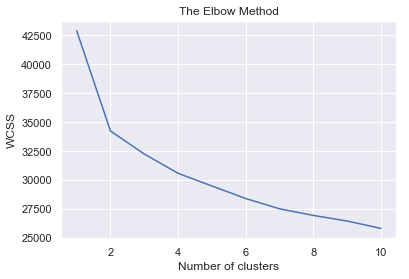

In [310]:
labels,knee , Kmeans_Score = Clustering().fit(x_train, x_test)

In [311]:
knee

3

In [312]:
Kmeans_Score

0.14639534596622478

In [313]:
labels

array([1, 1, 0, ..., 1, 0, 2])

In [281]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit(x_train)
labels = cluster.fit_predict(x_test)
labels

array([1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0,
       0, 0, 2, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 2,
       0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 0,
       0, 0, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 2, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2,
       2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1,

In [282]:
Hi_Score = silhouette_score(x_test,labels)
Hi_Score

0.11000559088872823

In [58]:
x_train.head()

,0,1,2,3
167,-1.696609,0.419722,0.999671,-0.942159
17,-1.079139,-0.253991,-2.062881,0.539253
69,-0.457992,-0.884399,0.308053,0.431747
86,0.382219,-0.745037,0.675678,-1.039829
193,-1.348777,1.160587,1.729542,-1.091311


In [24]:
from sklearn.cluster import AgglomerativeClustering
Hi = AgglomerativeClustering()
param_grid_Hi = {      
    'n_clusters' : range(1,11) ,
    'linkage' : ['ward', 'complete', 'average', 'single']
}
# Creating an object of the Grid Search class
grid= GridSearchCV( Hi,param_grid_Hi, verbose=3,cv=5 , scoring="accuracy")
# finding the best parameters
grid.fit(x_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ..........linkage=ward, n_clusters=1;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ..........linkage=ward, n_clusters=1;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ..........linkage=ward, n_clusters=1;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ..........linkage=ward, n_clusters=1;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ..........linkage=ward, n_clusters=1;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ..........linkage=ward, n_clusters=2;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ..........linkage=ward, n_clusters=2;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ..........linkage=ward, n_clusters=2;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ..........linkage=ward, n_clusters=2;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ..........linkage=ward, n_clusters=2;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ..........linkage=ward, n_clusters=3;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ..........linkage=ward, n_clusters=3;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ..........linkage=ward, n_clusters=3;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ..........linkage=ward, n_clusters=3;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ..........linkage=ward, n_clusters=3;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ..........linkage=ward, n_clusters=4;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ..........linkage=ward, n_clusters=4;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ..........linkage=ward, n_clusters=4;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ..........linkage=ward, n_clusters=4;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ..........linkage=ward, n_clusters=4;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ..........linkage=ward, n_clusters=5;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ..........linkage=ward, n_clusters=5;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ..........linkage=ward, n_clusters=5;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ..........linkage=ward, n_clusters=5;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ..........linkage=ward, n_clusters=5;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ..........linkage=ward, n_clusters=6;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ..........linkage=ward, n_clusters=6;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ..........linkage=ward, n_clusters=6;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ..........linkage=ward, n_clusters=6;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ..........linkage=ward, n_clusters=6;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ..........linkage=ward, n_clusters=7;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ..........linkage=ward, n_clusters=7;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ..........linkage=ward, n_clusters=7;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ..........linkage=ward, n_clusters=7;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ..........linkage=ward, n_clusters=7;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ..........linkage=ward, n_clusters=8;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ..........linkage=ward, n_clusters=8;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ..........linkage=ward, n_clusters=8;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ..........linkage=ward, n_clusters=8;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ..........linkage=ward, n_clusters=8;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ..........linkage=ward, n_clusters=9;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ..........linkage=ward, n_clusters=9;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ..........linkage=ward, n_clusters=9;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ..........linkage=ward, n_clusters=9;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ..........linkage=ward, n_clusters=9;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END .........linkage=ward, n_clusters=10;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END .........linkage=ward, n_clusters=10;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END .........linkage=ward, n_clusters=10;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END .........linkage=ward, n_clusters=10;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END .........linkage=ward, n_clusters=10;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ......linkage=complete, n_clusters=1;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ......linkage=complete, n_clusters=1;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ......linkage=complete, n_clusters=1;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ......linkage=complete, n_clusters=1;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ......linkage=complete, n_clusters=1;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ......linkage=complete, n_clusters=2;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ......linkage=complete, n_clusters=2;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ......linkage=complete, n_clusters=2;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ......linkage=complete, n_clusters=2;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ......linkage=complete, n_clusters=2;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ......linkage=complete, n_clusters=3;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ......linkage=complete, n_clusters=3;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ......linkage=complete, n_clusters=3;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ......linkage=complete, n_clusters=3;, score=nan total time=   1.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ......linkage=complete, n_clusters=3;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ......linkage=complete, n_clusters=4;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ......linkage=complete, n_clusters=4;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ......linkage=complete, n_clusters=4;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ......linkage=complete, n_clusters=4;, score=nan total time=   1.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ......linkage=complete, n_clusters=4;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ......linkage=complete, n_clusters=5;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ......linkage=complete, n_clusters=5;, score=nan total time=   1.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ......linkage=complete, n_clusters=5;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ......linkage=complete, n_clusters=5;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ......linkage=complete, n_clusters=5;, score=nan total time=   1.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ......linkage=complete, n_clusters=6;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ......linkage=complete, n_clusters=6;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ......linkage=complete, n_clusters=6;, score=nan total time=   1.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ......linkage=complete, n_clusters=6;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ......linkage=complete, n_clusters=6;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ......linkage=complete, n_clusters=7;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ......linkage=complete, n_clusters=7;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ......linkage=complete, n_clusters=7;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ......linkage=complete, n_clusters=7;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ......linkage=complete, n_clusters=7;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ......linkage=complete, n_clusters=8;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ......linkage=complete, n_clusters=8;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ......linkage=complete, n_clusters=8;, score=nan total time=   1.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ......linkage=complete, n_clusters=8;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ......linkage=complete, n_clusters=8;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ......linkage=complete, n_clusters=9;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ......linkage=complete, n_clusters=9;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ......linkage=complete, n_clusters=9;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ......linkage=complete, n_clusters=9;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ......linkage=complete, n_clusters=9;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END .....linkage=complete, n_clusters=10;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END .....linkage=complete, n_clusters=10;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END .....linkage=complete, n_clusters=10;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END .....linkage=complete, n_clusters=10;, score=nan total time=   1.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END .....linkage=complete, n_clusters=10;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END .......linkage=average, n_clusters=1;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END .......linkage=average, n_clusters=1;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END .......linkage=average, n_clusters=1;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END .......linkage=average, n_clusters=1;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END .......linkage=average, n_clusters=1;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END .......linkage=average, n_clusters=2;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END .......linkage=average, n_clusters=2;, score=nan total time=   1.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END .......linkage=average, n_clusters=2;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END .......linkage=average, n_clusters=2;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END .......linkage=average, n_clusters=2;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END .......linkage=average, n_clusters=3;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END .......linkage=average, n_clusters=3;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END .......linkage=average, n_clusters=3;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END .......linkage=average, n_clusters=3;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END .......linkage=average, n_clusters=3;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END .......linkage=average, n_clusters=4;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END .......linkage=average, n_clusters=4;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END .......linkage=average, n_clusters=4;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END .......linkage=average, n_clusters=4;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END .......linkage=average, n_clusters=4;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END .......linkage=average, n_clusters=5;, score=nan total time=   1.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END .......linkage=average, n_clusters=5;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END .......linkage=average, n_clusters=5;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END .......linkage=average, n_clusters=5;, score=nan total time=   1.2s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END .......linkage=average, n_clusters=5;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END .......linkage=average, n_clusters=6;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END .......linkage=average, n_clusters=6;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END .......linkage=average, n_clusters=6;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END .......linkage=average, n_clusters=6;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END .......linkage=average, n_clusters=6;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END .......linkage=average, n_clusters=7;, score=nan total time=   1.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END .......linkage=average, n_clusters=7;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END .......linkage=average, n_clusters=7;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END .......linkage=average, n_clusters=7;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END .......linkage=average, n_clusters=7;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END .......linkage=average, n_clusters=8;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END .......linkage=average, n_clusters=8;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END .......linkage=average, n_clusters=8;, score=nan total time=   1.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END .......linkage=average, n_clusters=8;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END .......linkage=average, n_clusters=8;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END .......linkage=average, n_clusters=9;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END .......linkage=average, n_clusters=9;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END .......linkage=average, n_clusters=9;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END .......linkage=average, n_clusters=9;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END .......linkage=average, n_clusters=9;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ......linkage=average, n_clusters=10;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ......linkage=average, n_clusters=10;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ......linkage=average, n_clusters=10;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ......linkage=average, n_clusters=10;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ......linkage=average, n_clusters=10;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ........linkage=single, n_clusters=1;, score=nan total time=   0.1s
[CV 2/5] END ........linkage=single, n_clusters=1;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ........linkage=single, n_clusters=1;, score=nan total time=   0.1s
[CV 4/5] END ........linkage=single, n_clusters=1;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ........linkage=single, n_clusters=1;, score=nan total time=   0.1s
[CV 1/5] END ........linkage=single, n_clusters=2;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ........linkage=single, n_clusters=2;, score=nan total time=   0.1s
[CV 3/5] END ........linkage=single, n_clusters=2;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ........linkage=single, n_clusters=2;, score=nan total time=   0.1s
[CV 5/5] END ........linkage=single, n_clusters=2;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ........linkage=single, n_clusters=3;, score=nan total time=   0.1s
[CV 2/5] END ........linkage=single, n_clusters=3;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ........linkage=single, n_clusters=3;, score=nan total time=   0.1s
[CV 4/5] END ........linkage=single, n_clusters=3;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ........linkage=single, n_clusters=3;, score=nan total time=   0.1s
[CV 1/5] END ........linkage=single, n_clusters=4;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ........linkage=single, n_clusters=4;, score=nan total time=   0.1s
[CV 3/5] END ........linkage=single, n_clusters=4;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ........linkage=single, n_clusters=4;, score=nan total time=   0.1s
[CV 5/5] END ........linkage=single, n_clusters=4;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ........linkage=single, n_clusters=5;, score=nan total time=   0.1s
[CV 2/5] END ........linkage=single, n_clusters=5;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ........linkage=single, n_clusters=5;, score=nan total time=   0.1s
[CV 4/5] END ........linkage=single, n_clusters=5;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ........linkage=single, n_clusters=5;, score=nan total time=   0.1s
[CV 1/5] END ........linkage=single, n_clusters=6;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ........linkage=single, n_clusters=6;, score=nan total time=   0.1s
[CV 3/5] END ........linkage=single, n_clusters=6;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ........linkage=single, n_clusters=6;, score=nan total time=   0.1s
[CV 5/5] END ........linkage=single, n_clusters=6;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END ........linkage=single, n_clusters=7;, score=nan total time=   0.1s
[CV 2/5] END ........linkage=single, n_clusters=7;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ........linkage=single, n_clusters=7;, score=nan total time=   0.1s
[CV 4/5] END ........linkage=single, n_clusters=7;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END ........linkage=single, n_clusters=7;, score=nan total time=   0.1s
[CV 1/5] END ........linkage=single, n_clusters=8;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END ........linkage=single, n_clusters=8;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ........linkage=single, n_clusters=8;, score=nan total time=   0.1s
[CV 4/5] END ........linkage=single, n_clusters=8;, score=nan total time=   0.1s
[CV 5/5] END ........linkage=single, n_clusters=8;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 1/5] END ........linkage=single, n_clusters=9;, score=nan total time=   0.1s
[CV 2/5] END ........linkage=single, n_clusters=9;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END ........linkage=single, n_clusters=9;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END ........linkage=single, n_clusters=9;, score=nan total time=   0.1s
[CV 5/5] END ........linkage=single, n_clusters=9;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END .......linkage=single, n_clusters=10;, score=nan total time=   0.1s
[CV 2/5] END .......linkage=single, n_clusters=10;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END .......linkage=single, n_clusters=10;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END .......linkage=single, n_clusters=10;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]



[CV 5/5] END .......linkage=single, n_clusters=10;, score=nan total time=   0.1s


GridSearchCV(cv=5, estimator=AgglomerativeClustering(),
             param_grid={'linkage': ['ward', 'complete', 'average', 'single'],
                         'n_clusters': range(1, 11)},
             scoring='accuracy', verbose=3)

In [36]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
class Hi:
    def __init__(self):
        pass
    def fit(self,x_train,x_test):
        self.Hi = DBSCAN()
        self.param_grid_Hi = {
            
            'eps' : [0.3,0.4 , 0.5] ,
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'] ,
            'leaf_size' : [30 , 40 , 60],
            'min_samples' : [10,20,50]
        

        }
        # Creating an object of the Grid Search class
        self.grid= GridSearchCV( self.Hi,self.param_grid_Hi, verbose=3,cv=5  , scoring="rand_score")
        # finding the best parameters
        self.grid.fit(x_train)

        # extracting the best parameters
        self.eps = self.grid.best_params_['eps']
        self.algorithm = self.grid.best_params_['algorithm']
        self.leaf_size = self.grid.best_params_['leaf_size']
        self.min_samples = self.grid.best_params_['min_samples']
        
        print(self.eps, self.algorithm,self.leaf_size, self.min_samples)

        # creating a new model with the best parameters
        self.Hi = DBSCAN(eps=self.eps, algorithm=self.algorithm,leaf_size=self.leaf_size, min_samples=self.min_samples)
        # training the mew model
        self.Hi.fit(x_train)
        labels = self.Hi.fit_predict(x_test)
        
        
        return labels
        

In [37]:
Hi().fit(x_train,x_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.1s
[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.1s
[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.1s
[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.1s
[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.1s
[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.1s
[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.1s
[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.1s
[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.1s
[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.1s
[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.2s
[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.1s
[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.1s
[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.1s
[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.1s
[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.2s
[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.1s
[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.1s
[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bha

[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.1s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.1s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.1s
[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.7s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.7s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.7s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.7s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.7s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.7s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.8s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.3s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.8s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.6s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.4s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.8s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   1.0s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.9s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'




[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.5s


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan

[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.8s
0.3 auto 30 10


array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [317]:
x_train

array([[-1.77369556,  1.98832246,  1.86337863, ...,  0.30811784,
        -0.29089783,  1.20291347],
       [-2.70103136,  1.19297806, -2.49678253, ..., -2.141452  ,
         1.05271983, -0.403808  ],
       [ 1.71626878, -0.19443745,  2.74748663, ..., -0.87527063,
         0.01469754, -1.03230805],
       ...,
       [-4.59627429,  0.27905977,  0.11121849, ...,  0.98142637,
        -0.67899226, -1.42990296],
       [ 4.18082763,  2.30551177,  3.06196937, ..., -0.01314304,
         0.89539708, -0.15212776],
       [ 0.68931741,  1.39538492, -1.15947458, ..., -0.79131494,
         0.20600773,  0.59416992]])

In [318]:
model = DBSCAN()
model.fit(x_train)
labels = model.fit_predict(x_train)
labels

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [294]:
labels = Hi().fit(x_train, x_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=30, min

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorit

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorit

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorit

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorit

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorit

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 5/5] END algorithm=auto, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorit

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorit

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=auto, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorit

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=30, min_samples=50;,

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=20;,

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=20;,

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=20;,

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=10;,

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=10;,

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=10;,

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=30, min_samples=50;,

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=40, min_samples=50;,

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=20;,

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 3/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan tot

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total tim

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=40, min_samples=50;, score=nan total tim

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=20;, score=nan total tim

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total tim

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total tim

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total tim

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total tim

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total tim

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total tim

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total tim

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total tim

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total tim

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 3/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, eps=0.5, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] E

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] E

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.3, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] E

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] E

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] E

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 2/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.4, leaf_size=60, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=20;, score=nan total time=   0.0s
[CV 2/5] E

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=30, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=10;, score=nan total time=   0.0s
[CV 1/5] E

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=20;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, eps=0.5, leaf_size=40, min_samples=50;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, eps=0.5, leaf_size=60, min_samples=10;, score=nan total time=   0.0s
[CV 4/5] E

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

 

AttributeError: 'DBSCAN' object has no attribute 'fit_transform'

In [295]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [89]:
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
from sklearn.metrics import silhouette_samples, silhouette_score , calinski_harabasz_score , davies_bouldin_score
# define dataset
# define the model
model = DBSCAN(eps=1.9335816413107338, min_samples= 18)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(x_train)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(x_train, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(x_train, yhat)
score_dbsacn_d = davies_bouldin_score(x_train, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.2750
Calinski Harabasz Score: 47.2711
Davies Bouldin Score: 1.6111


In [44]:
x_train

,0,1,2,3
167,-1.696609,0.419722,0.999671,-0.942159
17,-1.079139,-0.253991,-2.062881,0.539253
69,-0.457992,-0.884399,0.308053,0.431747
86,0.382219,-0.745037,0.675678,-1.039829
193,-1.348777,1.160587,1.729542,-1.091311
...,...,...,...,...
145,-1.522634,1.459016,-0.776777,-0.727288
51,-0.281780,0.243305,-1.399204,0.039657
35,-1.904547,-1.106802,-0.337489,0.060847
90,1.103567,-0.794313,0.855973,-1.618271


In [224]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,random_state=0)

#X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(x_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x_train, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


Automatically created module for IPython interactive environment
Silhouette Coefficient: -0.160


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 623

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


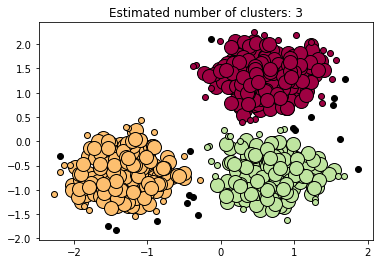

In [42]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [81]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(x_train)
labels = db_default.labels_

In [82]:
labels

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

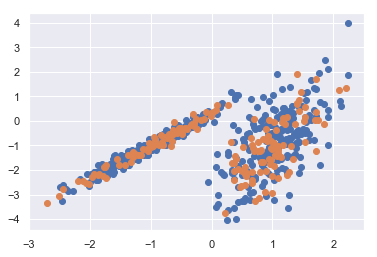

In [196]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(x_train)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [323]:
import os
dir = os.getcwd() + "/Result"
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

In [324]:
import os
dir = os.getcwd() + "/Result"
for f in os.listdir(dir):
    print(f)

In [56]:
import logging as lg
lg.basicConfig(filename="main.log", level=lg.INFO,
                       format='%(asctime)s - %(levelname)s {} -%(name)s -  %(message)s'.format(socket.gethostname()),datefmt='%d-%b-%y %H:%M:%S')
lg.info("HeLLO")

NameError: name 'socket' is not defined

In [3]:
import logging, platform

class HostnameFilter(logging.Filter):
    hostname = platform.node()

    def filter(self, record):
        record.hostname = HostnameFilter.hostname
        return True


logging.basicConfig(filename="main.log" , level=logging.INFO,format='{} - %(asctime)s - %(levelname)s -%(name)s -  %(message)s'.format(platform.node()),datefmt='%d-%b-%y %H:%M:%S')
handler = logging.StreamHandler()
handler.addFilter(HostnameFilter())
handler.setFormatter(logging.Formatter('%(asctime)s %(hostname)s: %(message)s', datefmt='%b %d %H:%M:%S'))
logger = logging.getLogger()
logger.addHandler(handler)
logger.setLevel(logging.INFO)

logger.info('Hello, world!')

Aug 07 22:40:14 DESKTOP-CBBFMQL: Hello, world!


In [73]:
platform.node()

'DESKTOP-CBBFMQL'

In [4]:
import socket    
hostname = socket.gethostname()    
IPAddr = socket.gethostbyname(hostname)    
print("Your Computer Name is:" + hostname)    
print("Your Computer IP Address is:" + IPAddr) 

Your Computer Name is:DESKTOP-CBBFMQL
Your Computer IP Address is:192.168.0.6


In [4]:
import sqlite3
import pandas as pd

In [ ]:
df = pd.read_excel('data.xlsx', index_col=0)
df = pd.read_csv('data.csv', index_col=0)
df = pd.read_json()
df = pd.read_html()
df = pd.read_sql()
df = pd.read_pickle()

In [58]:
import openpyxl
df = pd.read_excel('Train_xlsx.xlsx', engine='openpyxl')
df

,City,Suburb,Sales\n2Q 2020,Median\n2Q 2020,Sales\n2Q 2021,Median\n2Q 2021,Median\nChange
0,ADELAIDE,ADELAIDE,11.0,850000.0,4.0,1300000.0,0.529412
1,ADELAIDE,NORTH ADELAIDE,6.0,945000.0,10.0,1608000.0,0.701587
2,ADELAIDE HILLS,ALDGATE,9.0,795000.0,18.0,971000.0,0.221384
3,ADELAIDE HILLS,ASHTON,NaN,NaN,2.0,530000.0,NaN
4,ADELAIDE HILLS,BASKET RANGE,1.0,616000.0,1.0,800000.0,0.298701
...,...,...,...,...,...,...,...
474,WEST TORRENS,THEBARTON,2.0,795000.0,4.0,601000.0,-0.244025
475,WEST TORRENS,TORRENSVILLE,8.0,662000.0,11.0,770500.0,0.163897
476,WEST TORRENS,UNDERDALE,6.0,630000.0,9.0,881035.0,0.398468
477,WEST TORRENS,WEST BEACH,10.0,932500.0,15.0,1183000.0,0.268633


In [59]:
df = pd.read_csv('Train_csv.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [63]:
import json

with open('Train_json.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [64]:
df2 = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')
df2.head(2)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39


In [80]:
df6=pd.read_html('''https://www.basketball-reference.com/players/i/ibakase01.html?utm_source=direct&utm_medium=Share&utm_campaign=ShareTool
''')
df6[2].head(2)

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 30,Trp Dbl
0,2009-10,20.0,OKC,NBA,PF,73.0,0.0,1323.0,201.0,370.0,...,259.0,397.0,10.0,25.0,97.0,68.0,194.0,461.0,NaN,0.0
1,2010-11,21.0,OKC,NBA,PF,82.0,44.0,2216.0,335.0,617.0,...,408.0,622.0,22.0,31.0,198.0,71.0,267.0,808.0,NaN,0.0


In [68]:
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt', sep=" ")
data.head(2)

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43


# Task
### Chiptole.tsv Dataset
https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

### Beer.txt Dataset
https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt

### US_Crime_Rates_1960_2014.csv DataSet
https://gist.githubusercontent.com/ganeshbabuNN/9ef28b5313d52b0007e8de63c33ff435/raw/f69899e2ad7798bc64692f080272821c84e29a07/US_Crime_Rates_1960_2014.csv

### vincentarelbundock openintro causaldata HMLdiag
https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/datasets.csv

### Ineuron Practise Examples in  Pandas
https://drive.google.com/file/d/1etGP85wJWsgqbsh3gX5oxc8dPKLMA1eT/view

### HTML Dataset
https://www.basketball-reference.com/players/i/ibakase01.html?utm_source=direct&utm_medium=Share&utm_campaign=ShareTool

In [2]:

import pandas as pd
import json


class Dataset:
    def __init__(self):
        pass
    def DataFrame(self,  type_of_dataset , output_column , dataset_path ):
        if type_of_dataset == "csv":
            df = pd.read_csv(dataset_path)
            df.rename(columns = { output_column :'output'}, inplace = True)
            return df
        
        elif type_of_dataset == "xlsx":
            df = pd.read_excel(dataset_path, engine='openpyxl')
            df.rename(columns = { output_column :'output'}, inplace = True)
            return df
        
        elif type_of_dataset == "json":
            
            with open(dataset_path) as f:
                data = json.load(f)

            df = pd.DataFrame(data)
            df.rename(columns = { output_column :'output'}, inplace = True)
            return df
        
        elif type_of_dataset == "tsv":
            df = pd.read_table(dataset_path , sep='\t')
            df.rename(columns = { output_column :'output'}, inplace = True)
            return df
        
        elif type_of_dataset == "html":
            df = pd.read_html(dataset_path)
            df.rename(columns = { output_column :'output'}, inplace = True)
            return df
        
        elif type_of_dataset == "txt":
            df =  pd.read_csv(dataset_path, sep=" ")
            df.rename(columns = { output_column :'output'}, inplace = True)
            return df


## csv

In [105]:
df = Dataset().DataFrame("csv" , "smoker" , "Train_csv.csv")
df.head(2)

,total_bill,tip,sex,output,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [106]:
df = Dataset().DataFrame("csv", "Vehicle_Theft" , "https://gist.githubusercontent.com/ganeshbabuNN/9ef28b5313d52b0007e8de63c33ff435/raw/f69899e2ad7798bc64692f080272821c84e29a07/US_Crime_Rates_1960_2014.csv")
df.head(2)

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,output
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000


## xlsx

In [3]:
df = Dataset().DataFrame("xlsx" , "Sales\n2Q 2021" , "Regression_Fight500.xlsx")
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


## json

In [108]:
df = Dataset().DataFrame("json" , None , "Train_json.json")
df.head(2)

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


## tsv

In [109]:
df = Dataset().DataFrame("tsv", None ,"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")
df.head(2)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39


## html

In [86]:
df = Dataset().DataFrame("html", '''https://www.basketball-reference.com/players/i/ibakase01.html?utm_source=direct&utm_medium=Share&utm_campaign=ShareTool''')
df[2].head(2)

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 30,Trp Dbl
0,2009-10,20.0,OKC,NBA,PF,73.0,0.0,1323.0,201.0,370.0,...,259.0,397.0,10.0,25.0,97.0,68.0,194.0,461.0,NaN,0.0
1,2010-11,21.0,OKC,NBA,PF,82.0,44.0,2216.0,335.0,617.0,...,408.0,622.0,22.0,31.0,198.0,71.0,267.0,808.0,NaN,0.0


## txt

In [85]:
df = Dataset().DataFrame("txt" , "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt" )
df.head(2)

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43


try:
    if type_of_problem == "Regression":
        df = pd.read_csv(dataset_path + "\Regression_Train.csv")
        Logger().log("main.py", "INFO", "Regression_Train Dataset Reading Successful")
    elif type_of_problem == "Classification":
        df = pd.read_csv(dataset_path + "\Classification_Train.csv")
        Logger().log("main.py", "INFO", "Classification_Train Dataset Reading Successful")
    elif type_of_problem == "Clustering":
        df = pd.read_csv(dataset_path + "\Clustering_Train.csv")
        Logger().log("main.py", "INFO", "Clustering_Train Dataset Reading Successful")
    else:
        Logger().log("main.py", "INFO", "Please Check the Spelling of type_of_problem : 1. Regression 2. Classification 3.Clustering ")
        return jsonify("Please Check the Spelling of type_of_problem : 1. Regression 2. Classification 3.Clustering ")

In [5]:
from cassandra.util import OrderedMapSerializedKey
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
import pandas as pd
import csv

class database:
    
    def __init__(self):
        cloud_config= {'secure_connect_bundle': 'M:\secure-connect-automldb.zip'}
        auth_provider = PlainTextAuthProvider('QTHrHUiIpBqCzdEARCwfPAyN', 'MIMI10nlWagbX5hjZGBheHm+vDrnSYhCOClA8+StvdLM2gw_TRu5UZRmuDlU7zKwBjvqwTzt0WIA-DfzHfD8NSlCc+HzEzl9w2zCoQABEenf9g+AKD_NhSa44vnNYovE')
        cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
        self.session  = cluster.connect('AutoMLKS')
        self.session.default_timeout = 60
    
    
    def existing_tables(self):
        row = self.session.execute("SELECT table_name FROM system_schema.tables WHERE keyspace_name='AutoMLKS';").all()
        return row
    
    
    def is_table_exists(self, table_name):
        row = self.existing_tables()
        for i in range(len(row)):
            if str(row[i][0]) == table_name:
                return True
            else:
                continue
        return False
    
    
    def drop_table(self,table_name):
        self.session.execute("DROP table " + str(table_name) + ";").all()
        
        
    def create_table(self,table_name,df):
        df1 = pd.read_csv(df)
        s = ''
        for i in df1.columns:
            s += str(i) + ' ' + 'text' + ','
        print("CREATE TABLE " + str(table_name) + " (" + str(s) + "PRIMARY KEY (" + str(df1.columns[0]) + ") );")
        self.session.execute("CREATE TABLE " + str(table_name) + " (" + str(s) + "PRIMARY KEY (" + str(df1.columns[0]) + ") );").one()

    def insert_into_table(self, df,table_name):
        df1 = pd.read_csv(df)
        s1 = ''
        for i in df1.columns:
            s1 += str(i) + ','

        s2 = '%s,' * len(df1.columns)

        csv_data = csv.reader(open(df))
        header = next(csv_data)
        for i in csv_data:
            row = self.session.execute("INSERT INTO " + str(table_name) + " (" + str(s1[:-1]) + ") VALUES (" +  str(s2[:-1]) + ");",i).one()
        
    
    
    def database_dataframe(self,df,type_of_problem):
        df1 = pd.read_csv(df)
        type_of_problem = type_of_problem.lower()
        table_name = str(type_of_problem) + str(df1.shape[0])
        print(table_name)
        if self.is_table_exists(table_name):
            self.drop_table(table_name)
            self.create_table(table_name,df)
            self.insert_into_table(df,table_name)
            return self.show_table(table_name,df)
        else:
            self.create_table(table_name,df)
            self.insert_into_table(df,table_name)
            return self.show_table(table_name,df)
        
    
    def pandas_factory(self ,colnames, rows):

        # Convert tuple items of 'rows' into list (elements of tuples cannot be replaced)
        rows = [list(i) for i in rows]

        # Convert only 'OrderedMapSerializedKey' type list elements into dict
        for idx_row, i_row in enumerate(rows):

            for idx_value, i_value in enumerate(i_row):

                if type(i_value) is OrderedMapSerializedKey:

                    rows[idx_row][idx_value] = dict(rows[idx_row][idx_value])

        return pd.DataFrame(rows, columns=colnames)
         
    def show_table(self,table_name,df):
        df1 = pd.read_csv(df)
        colnames = df1.columns
        rows = self.session.execute("SELECT * FROM " + str(table_name) + ";").all() 
        df = self.pandas_factory(colnames, rows)
        #for i in range(len(df1.dtypes)):
            #df[df.columns[i]] = df[df.columns[i]].astype(df1.dtypes[i]) 
        return pd.DataFrame(rows) , df1 , df

In [6]:
rows , df1 , df = database().database_dataframe("CC_GENERAL_Reg.csv","Regression")

regression100
CREATE TABLE regression100 (CUST_ID text,BALANCE text,BALANCE_FREQUENCY text,PURCHASES text,ONEOFF_PURCHASES text,INSTALLMENTS_PURCHASES text,CASH_ADVANCE text,PURCHASES_FREQUENCY text,ONEOFF_PURCHASES_FREQUENCY text,PURCHASES_INSTALLMENTS_FREQUENCY text,CASH_ADVANCE_FREQUENCY text,CASH_ADVANCE_TRX text,PURCHASES_TRX text,CREDIT_LIMIT text,PAYMENTS text,MINIMUM_PAYMENTS text,PRC_FULL_PAYMENT text,TENURE text,PRIMARY KEY (CUST_ID) );


In [7]:
rows.head(2)

,cust_id,balance,balance_frequency,cash_advance,cash_advance_frequency,cash_advance_trx,credit_limit,installments_purchases,minimum_payments,oneoff_purchases,oneoff_purchases_frequency,payments,prc_full_payment,purchases,purchases_frequency,purchases_installments_frequency,purchases_trx,tenure
0,C10053,1078.888565,1.0,0.0,0.0,0,2500.0,886.11,1322.4466009999999,2221.74,0.583333,1399.82834,0.0,3107.85,0.666667,0.5,18,12
1,C10060,3971.1387649999997,1.0,224.575517,0.181818,3,4000.0,0.0,1600.212243,0.0,0.0,764.9387280000001,0.0,0.0,0.0,0.0,0,11


In [8]:
df1.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [9]:
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10053,1078.888565,1.0,0.0,0.0,0,2500.0,886.11,1322.4466009999999,2221.74,0.583333,1399.82834,0.0,3107.85,0.666667,0.5,18,12
1,C10060,3971.1387649999997,1.0,224.575517,0.181818,3,4000.0,0.0,1600.212243,0.0,0.0,764.9387280000001,0.0,0.0,0.0,0.0,0,11


In [5]:
df1.dtypes

CustomerID        int64
Genre            object
Age               int64
AnnualIncomek     int64
SpendingScore     int64
dtype: object

In [6]:
df.dtypes

CustomerID       object
Genre            object
Age              object
AnnualIncomek    object
SpendingScore    object
dtype: object

In [14]:
import re
txt =  "50High ($!@#$%^&&*((50)"
pattern = re.compile("[^a-zA-Z]+")
pattern.sub("",txt)

'High'

In [15]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df = df.head(50)
df.to_csv("Mall_Columns.csv",index = False)

In [17]:
import pandas as pd
df = pd.read_csv("Mall_Columns.csv")
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [18]:
import re
l = []
pattern = re.compile("[^a-zA-Z]+")
for i in df.columns:
    l.append(pattern.sub("",i))
df.columns = l

In [19]:
df.to_csv("Mall_Col.csv",index=False)

In [21]:
df = pd.read_csv("Mall_Col.csv")
df.head()

,CustomerID,Genre,Age,AnnualIncomek,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
from cassandra.util import OrderedMapSerializedKey
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
import pandas as pd
import csv

class database:
    
    def __init__(self,csv_file):
        cloud_config= {'secure_connect_bundle': 'M:\secure-connect-automldb.zip'}
        auth_provider = PlainTextAuthProvider('QTHrHUiIpBqCzdEARCwfPAyN', 'MIMI10nlWagbX5hjZGBheHm+vDrnSYhCOClA8+StvdLM2gw_TRu5UZRmuDlU7zKwBjvqwTzt0WIA-DfzHfD8NSlCc+HzEzl9w2zCoQABEenf9g+AKD_NhSa44vnNYovE')
        cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
        self.session  = cluster.connect('AutoMLKS')
        self.session.default_timeout = 60
        self.df1 = pd.read_csv(csv_file)
        self.csv_data = csv.reader(open(csv_file))
    
    
    def existing_tables(self):
        row = self.session.execute("SELECT table_name FROM system_schema.tables WHERE keyspace_name='AutoMLKS';").all()
        return row
    
    
    def is_table_exists(self, table_name):
        row = self.existing_tables()
        for i in range(len(row)):
            if str(row[i][0]) == table_name:
                return True
            else:
                continue
        return False
    
    
    def drop_table(self,table_name):
        self.session.execute("DROP table " + str(table_name) + ";").all()
        
        
    def create_table(self,table_name):
        s = ''
        for i in self.df1.columns:
            s += str(i) + ' ' + 'text' + ','
        print("CREATE TABLE " + str(table_name) + " (" + str(s) + "PRIMARY KEY (" + str(self.df1.columns[0]) + ") );")
        self.session.execute("CREATE TABLE " + str(table_name) + " (" + str(s) + "PRIMARY KEY (" + str(self.df1.columns[0]) + ") );").one()

    def insert_into_table(self,table_name):
        s1 = ''
        for i in self.df1.columns:
            s1 += str(i) + ','

        s2 = '%s,' * len(self.df1.columns)

        header = next(self.csv_data)
        for i in self.csv_data:
            row = self.session.execute("INSERT INTO " + str(table_name) + " (" + str(s1[:-1]) + ") VALUES (" +  str(s2[:-1]) + ");",i).one()
        
    
    
    def database_dataframe(self,type_of_problem):
        type_of_problem = type_of_problem.lower()
        table_name = str(type_of_problem) + str(self.df1.shape[0])
        print(table_name)
        if self.is_table_exists(table_name):
            self.drop_table(table_name)
            self.create_table(table_name)
            self.insert_into_table(table_name)
            return self.show_table(table_name)
        else:
            self.create_table(table_name)
            self.insert_into_table(table_name)
            return self.show_table(table_name)
        
    
    def pandas_factory(self ,colnames, rows):

        # Convert tuple items of 'rows' into list (elements of tuples cannot be replaced)
        rows = [list(i) for i in rows]

        # Convert only 'OrderedMapSerializedKey' type list elements into dict
        for idx_row, i_row in enumerate(rows):

            for idx_value, i_value in enumerate(i_row):

                if type(i_value) is OrderedMapSerializedKey:

                    rows[idx_row][idx_value] = dict(rows[idx_row][idx_value])

        return pd.DataFrame(rows, columns=colnames)
         
    def show_table(self,table_name):
        colnames = self.df1.columns
        rows = self.session.execute("SELECT * FROM " + str(table_name) + ";").all() 
        df = self.pandas_factory(colnames, rows)
        #for i in range(len(self.df1.dtypes)):
            #self.df[self.df.columns[i]] = self.df[self.df.columns[i]].astype(self.df1.dtypes[i]) 
        return pd.DataFrame(rows) , df1 , df

In [11]:
rows , df1 , df = database("CC_GENERAL_Reg.csv").database_dataframe("Regression")

regression100
CREATE TABLE regression100 (CUST_ID text,BALANCE text,BALANCE_FREQUENCY text,PURCHASES text,ONEOFF_PURCHASES text,INSTALLMENTS_PURCHASES text,CASH_ADVANCE text,PURCHASES_FREQUENCY text,ONEOFF_PURCHASES_FREQUENCY text,PURCHASES_INSTALLMENTS_FREQUENCY text,CASH_ADVANCE_FREQUENCY text,CASH_ADVANCE_TRX text,PURCHASES_TRX text,CREDIT_LIMIT text,PAYMENTS text,MINIMUM_PAYMENTS text,PRC_FULL_PAYMENT text,TENURE text,PRIMARY KEY (CUST_ID) );


In [12]:
rows.head(2)

,cust_id,balance,balance_frequency,cash_advance,cash_advance_frequency,cash_advance_trx,credit_limit,installments_purchases,minimum_payments,oneoff_purchases,oneoff_purchases_frequency,payments,prc_full_payment,purchases,purchases_frequency,purchases_installments_frequency,purchases_trx,tenure
0,C10053,1078.888565,1.0,0.0,0.0,0,2500.0,886.11,1322.4466009999999,2221.74,0.583333,1399.82834,0.0,3107.85,0.666667,0.5,18,12
1,C10060,3971.1387649999997,1.0,224.575517,0.181818,3,4000.0,0.0,1600.212243,0.0,0.0,764.9387280000001,0.0,0.0,0.0,0.0,0,11


In [13]:
df1.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [14]:
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10053,1078.888565,1.0,0.0,0.0,0,2500.0,886.11,1322.4466009999999,2221.74,0.583333,1399.82834,0.0,3107.85,0.666667,0.5,18,12
1,C10060,3971.1387649999997,1.0,224.575517,0.181818,3,4000.0,0.0,1600.212243,0.0,0.0,764.9387280000001,0.0,0.0,0.0,0.0,0,11


In [ ]:
' 0.6 '  

In [15]:
' 0.6 '

0.6

In [90]:
from cassandra.util import OrderedMapSerializedKey
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
import pandas as pd
import csv

class database:
    
    def __init__(self,csv_file):
        cloud_config= {'secure_connect_bundle': 'M:\secure-connect-automldb.zip'}
        auth_provider = PlainTextAuthProvider('QTHrHUiIpBqCzdEARCwfPAyN', 'MIMI10nlWagbX5hjZGBheHm+vDrnSYhCOClA8+StvdLM2gw_TRu5UZRmuDlU7zKwBjvqwTzt0WIA-DfzHfD8NSlCc+HzEzl9w2zCoQABEenf9g+AKD_NhSa44vnNYovE')
        cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
        self.session  = cluster.connect('AutoMLKS')
        self.session.default_timeout = 60
        self.df1 = pd.read_csv(csv_file)
        self.csv_data = csv.reader(open(csv_file))
    
    
    def existing_tables(self):
        row = self.session.execute("SELECT table_name FROM system_schema.tables WHERE keyspace_name='AutoMLKS';").all()
        return row
    
    
    def is_table_exists(self, table_name):
        row = self.existing_tables()
        for i in range(len(row)):
            if str(row[i][0]) == table_name:
                return True
            else:
                continue
        return False
    
    
    def drop_table(self,table_name):
        self.session.execute("DROP table " + str(table_name) + ";").all()
        
        
    def create_table(self,table_name):
        s = ''
        for i in self.df1.columns:
            s += str(i) + ' ' + 'text' + ','
        print("CREATE TABLE " + str(table_name) + " (" + str(s) + "PRIMARY KEY (" + str(self.df1.columns[0]) + ") );")
        self.session.execute("CREATE TABLE " + str(table_name) + " (" + str(s) + "PRIMARY KEY (" + str(self.df1.columns[0]) + ") );").one()

    def insert_into_table(self,table_name):
        s1 = ''
        for i in self.df1.columns:
            s1 += str(i) + ','

        s2 = '%s,' * len(self.df1.columns)

        header = next(self.csv_data)
        for i in self.csv_data:
            row = self.session.execute("INSERT INTO " + str(table_name) + " (" + str(s1[:-1]) + ") VALUES (" +  str(s2[:-1]) + ");",i).one()
        
    
    
    def database_dataframe(self,type_of_problem):
        type_of_problem = type_of_problem.lower()
        table_name = str(type_of_problem) + str(self.df1.shape[0])
        print(table_name)
        if self.is_table_exists(table_name):
            self.drop_table(table_name)
            self.create_table(table_name)
            self.insert_into_table(table_name)
            return self.show_table(table_name)
        else:
            self.create_table(table_name)
            self.insert_into_table(table_name)
            return self.show_table(table_name)
        
    
    def pandas_factory(self ,colnames, rows):

        # Convert tuple items of 'rows' into list (elements of tuples cannot be replaced)
        rows = [list(i) for i in rows]

        # Convert only 'OrderedMapSerializedKey' type list elements into dict
        for idx_row, i_row in enumerate(rows):

            for idx_value, i_value in enumerate(i_row):

                if type(i_value) is OrderedMapSerializedKey:

                    rows[idx_row][idx_value] = dict(rows[idx_row][idx_value])

        return pd.DataFrame(rows, columns=colnames)
         
    def show_table(self,table_name):
        colnames = self.df1.columns
        rows = self.session.execute("SELECT * FROM " + str(table_name) + ";").all() 
        df = self.pandas_factory(colnames, rows)
       # print(df.dtypes)
        #print(self.df1.dtypes)
        for i in range(len(self.df1.dtypes)):
            print(df.columns[i] , self.df1.dtypes[i])
            df[df.columns[i]] = df[df.columns[i]].astype(self.df1.dtypes[i]) 
        return pd.DataFrame(rows) , self.df1 , df

In [ ]:
rows , df1 , df = database("Mall_Col.csv").database_dataframe("Regression")

In [75]:
df.dtypes

Id         int64
Name      object
Price    float64
Stock      int64
dtype: object

In [47]:
import pandas as pd
df = pd.read_csv("Fruits.csv")
df.dtypes

Id         int64
Name      object
Price    float64
Stock      int64
dtype: object

In [30]:
d = {None: 'NULL' , bool : 'boolean' , 'float64' : float , int : int , 'int64' : int , str : 'text' , 'date' : 'date' , object : 'text'}
s = ''
dtypes = df.dtypes.to_dict().items()
for i in df.columns:
    s += str(i) + ' ' + str(d[dtypes[i]]) + ','
print("CREATE TABLE " + str(table_name) + " (" + str(s) + "PRIMARY KEY (" + str(df.columns[0]) + ") );")

TypeError: 'dict_items' object is not subscriptable

In [27]:
df.dtypes.values[0]

dtype('int64')

In [13]:
dtypes[0] == int

False

In [29]:
dtypes = df.dtypes.to_dict()

for col_nam, typ in dtypes.items():
    print( typ )

int64
object
float64
int64


In [32]:
dtypes = df.dtypes.to_dict().items()
dtypes

dict_items([('Id', dtype('int64')), ('Name', dtype('O')), ('Price', dtype('float64')), ('Stock', dtype('int64'))])

In [33]:
dtypes = df.dtypes.to_dict()
dtypes

{'Id': dtype('int64'),
 'Name': dtype('O'),
 'Price': dtype('float64'),
 'Stock': dtype('int64')}

In [44]:
import numpy as np
print(np.nan)

nan


In [45]:
d = {np.nan: 'NULL' , np.dtype('bool') : 'boolean' , np.dtype('float64') : 'float'  , np.dtype('int64') : 'int' , np.dtype('O') : 'text' }
s = ''
table_name ="KOTHI"
dtypes = df.dtypes.to_dict()
for i in df.columns:
    s += str(i) + ' ' + str(d[dtypes[i]]) + ','
print("CREATE TABLE " + str(table_name) + " (" + str(s) + "PRIMARY KEY (" + str(df.columns[0]) + ") );")

CREATE TABLE KOTHI (Id int,Name text,Price float,Stock int,PRIMARY KEY (Id) );


In [38]:
import numpy as np
print(np.dtype('int64') == 'int64')

True


In [62]:
df.dtypes.to_dict()

{'Id': dtype('int64'),
 'Name': dtype('O'),
 'Price': dtype('float64'),
 'Stock': dtype('int64')}

In [ ]:
 d = {np.nan: 'NULL' , np.dtype('bool') : 'boolean' , np.dtype('float64') : 'double'  , np.dtype('int64') : 'int' , np.dtype('O') : 'text' }

In [3]:
import pandas as pd
df = pd.read_csv("Clustering_Train.csv")
df = df.head(100)
df.to_csv("Clustering_Train1.csv",index=False)

In [95]:
from tqdm import tqdm
import time

#loop with progressbar:
it=tqdm(total=10)
for i in range(10):
    time.sleep(0.1)
    it.update(1)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.11it/s]

In [9]:
df = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv" , sep='\t')
df.head(2)
df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [5]:
df = pd.read_csv("Hp_Train.csv")
df.shape

(1460, 81)

In [3]:
import pandas as pd
df = pd.read_csv("Regression_GPU.csv")
df = df.head(100)
df.to_csv("Regression_GPU100.csv",index=False)

In [85]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [5]:
import pandas as pd
df = pd.read_excel("Regression_HP.xlsx", engine='openpyxl')
df.shape

(414, 8)

In [7]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
df = pd.read_csv("Classification_TermDeposit.csv")
df = df.head(100)
df.to_csv("Classification_TermDeposit100.csv",index=False)

In [9]:
df.head(2)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no


In [ ]:
Classification_TermDeposit

In [7]:
import pandas as pd
df = pd.read_excel("Regression_Fight.xlsx", engine='openpyxl')
df.shape

(500, 11)

In [6]:
df = pd.read_excel("Regression_Fight.xlsx", engine='openpyxl')
df = df.head(500)
df.to_excel("Regression_Fight.xlsx",index=False) 

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [18]:
df = pd.read_csv("Regression_GPU.csv")
df = df.head(500)
df.to_csv("Regression_GPU500.csv",index=False)

In [19]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1(ms),Run2(ms),Run3(ms),Run4(ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [20]:
import re
l = []
pattern = re.compile("[^0-9a-zA-Z]+")
for i in df.columns:
    l.append(pattern.sub("",i))
df.columns = l

In [21]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1ms,Run2ms,Run3ms,Run4ms
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [22]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering


data = pd.read_csv("Clustering_CCGENERAL.csv")
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_,
                                                 average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\sklearn\cluster\_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


In [23]:
results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.662295,0.736567,0.735448,0.742972,0.739191,0.182097
Affinity,0.175174,0.612460,0.958907,0.486901,0.645857,0.115197
Spectral,0.756461,0.852040,0.831691,0.876614,0.853562,0.182729
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170,0.178497


In [24]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering


data = datasets.load_digits()
X, y = data.data, data.target


In [13]:
import pandas as pd

# create dataframe
df_marks = pd.DataFrame({'name': ['Somu', 'Kiku', 'Amol', 'Lini'],
     'physics': [68, 74, 77, 78],
     'chemistry': [84, 56, 73, 69],
     'algebra': [78, 88, 82, 87] ,
      'model' : ['finalized_model_Classification.pickle' , 'finalized_model_Classification.pickle' , 'finalized_model_Classification.pickle' , 'finalized_model_Classification.pickle']})

# render dataframe as html
html = df_marks.to_html()
print(html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>name</th>
      <th>physics</th>
      <th>chemistry</th>
      <th>algebra</th>
      <th>model</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Somu</td>
      <td>68</td>
      <td>84</td>
      <td>78</td>
      <td>finalized_model_Classification.pickle</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Kiku</td>
      <td>74</td>
      <td>56</td>
      <td>88</td>
      <td>finalized_model_Classification.pickle</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Amol</td>
      <td>77</td>
      <td>73</td>
      <td>82</td>
      <td>finalized_model_Classification.pickle</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Lini</td>
      <td>78</td>
      <td>69</td>
      <td>87</td>
      <td>finalized_model_Classification.pickle</td>
    </tr>
  </tbody>
</table>


In [14]:
import pandas as pd
l = [" ", "recommended" , " "]
pd.DataFrame(l,columns=["Recommended"])

,Recommended
0,
1,recommended
2,


In [29]:
import pandas as pd
from IPython.display import HTML
a = 'href="/Result/LogisticRegression_Model.pickle" download="LogisticRegression_Model.pickle">LogisticRegression_Model'
b = 'href="/Result/LogisticRegression_Model.pickle" download="LogisticRegression_Model.pickle">LogisticRegression_Model'

In [30]:
l = [a,b]

In [31]:
df = pd.DataFrame(l)
df

,0
0,"href=""/Result/LogisticRegression_Model.pickle""..."
1,"href=""/Result/LogisticRegression_Model.pickle""..."


In [35]:
html = df.to_html(escape=False)
print(html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>href="/Result/LogisticRegression_Model.pickle" download="LogisticRegression_Model.pickle">LogisticRegression_Model</td>
    </tr>
    <tr>
      <th>1</th>
      <td>href="/Result/LogisticRegression_Model.pickle" download="LogisticRegression_Model.pickle">LogisticRegression_Model</td>
    </tr>
  </tbody>
</table>


In [24]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html)
soup

<html><body><table border="1" class="dataframe">
<thead>
<tr style="text-align: right;">
<th></th>
<th>0</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>&lt;IPython.core.display.HTML object&gt;</td>
</tr>
<tr>
<th>1</th>
<td>&lt;IPython.core.display.HTML object&gt;</td>
</tr>
</tbody>
</table></body></html>

In [4]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering


data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_,
                                                 average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.668587,0.741156,0.739464,0.748061,0.743737,0.182524
Affinity,0.175174,0.612460,0.958907,0.486901,0.645857,0.115197
Spectral,0.756461,0.852040,0.831691,0.876614,0.853562,0.182729
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170,0.178497


In [20]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test = train_test_split(PCA_X, test_size=0.30, random_state=355)
print(x_train.shape)
print(x_test.shape)

(6265, 6)
(2685, 6)


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
class Hi:
    def __init__(self):
        pass
    def fit(self,x_train,x_test):
        self.Hi = DBSCAN()
        self.param_grid_Hi = {
            
            'eps' : [0.3,0.4 , 0.5] ,
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'] ,
            'leaf_size' : [30 , 40 , 60],
            'min_samples' : [10,20,50]
        

        }
        # Creating an object of the Grid Search class
        self.grid= GridSearchCV( self.Hi,self.param_grid_Hi, verbose=3,cv=5  , scoring="accuracy")
        # finding the best parameters
        self.grid.fit(x_train)

        # extracting the best parameters
        self.eps = self.grid.best_params_['eps']
        self.algorithm = self.grid.best_params_['algorithm']
        self.leaf_size = self.grid.best_params_['leaf_size']
        self.min_samples = self.grid.best_params_['min_samples']
        
        print(self.eps, self.algorithm,self.leaf_size, self.min_samples)

        # creating a new model with the best parameters
        self.Hi = DBSCAN(eps=self.eps, algorithm=self.algorithm,leaf_size=self.leaf_size, min_samples=self.min_samples)
        # training the mew model
        self.Hi.fit_transform(x_train)
        labels = self.Hi.fit_predict(x_test)
        
        
        return labels
        

In [ ]:
Silhouette_Score , calinski_harabasz_score , davies_bouldin_score

In [41]:
import pandas as pd
pd.read_csv("HP.cvs")

FileNotFoundError: [Errno 2] File b'HP.cvs' does not exist: b'HP.cvs'

In [1]:
import sklearn; sklearn.show_versions()


System:
    python: 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Bharadwaj\.conda\envs\gputest\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 21.0.1
   setuptools: 52.0.0.post20210125
      sklearn: 0.24.2
        numpy: 1.19.3
        scipy: 1.5.4
       Cython: 0.29.23
       pandas: 1.1.5
   matplotlib: 3.3.4
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True
